# Notebook imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
TOKEN_SPAM_PROB_FILE = "SpamData/03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE = "SpamData/03_Testing/prob-nonspam.txt"
TOKEN_ALL_PROB_FILE = "SpamData/03_Testing/prob-all-tokens.txt"

TEST_FEATURE_MATRIX = "SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE = "SpamData/03_Testing/test-target.txt"

VOCAB_SIZE = 2500

# Load data

In [38]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter = " ")
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter = " ")
# TOKEN Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter = " ")
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter = " ")
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter = " ")

# Calculating the Joint Probability
### Using the dot product

In [39]:
print("shape of the dot product is:", X_test.dot(prob_token_spam).shape)

shape of the dot product is: (1724,)


## Set the Prior

In [40]:
PROB_SPAM = 0.3116

In [41]:
np.log(prob_token_spam)

array([ -4.4075528 ,  -5.25362761,  -4.99003004, ..., -12.09417414,
       -10.30241467,  -9.0496517 ])

## Joint probability in log format

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [42]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam))} {P(X)} $$

In [43]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [44]:
joint_log_ham.size

1724

# Making Predictions
### Check for the higher joint probability
$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
### <center>OR</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [45]:
prediction = joint_log_spam > joint_log_ham

In [46]:
print(prediction * 1)
print(prediction)

[1 1 1 ... 0 0 0]
[ True  True  True ... False False False]


### Simplified calculation
$$P(X \, | \, Spam \,) \, P(Spam) \neq \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)} $$

In [47]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

# Metrics and Evaluation
## Accuracy

In [53]:
correct_docs = (y_test == prediction).sum()
print("Number of Docs classified correctly:", correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print("Number of Docs classified incorrectly:", numdocs_wrong)

Number of Docs classified correctly: 1685
Number of Docs classified incorrectly: 39


In [60]:
# Accuracy
print("{:.2%}".format(correct_docs / len(X_test)))
print("{:.2%}".format(numdocs_wrong / len(X_test)))

97.74%
2.26%


# Visualizing the Results

In [71]:
# Chart Styling
yaxis_label = "P(X | Spam)"
xaxis_label = "P(X | Nonspam)"

linedata = np.linspace(start = -14000, stop = 1, num = 1000)

<function matplotlib.pyplot.show(*args, **kw)>

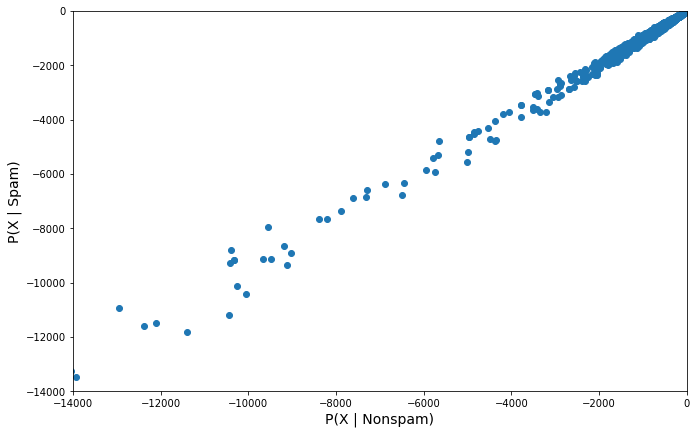

In [72]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam)
plt.show

## The Decision Boundary

<function matplotlib.pyplot.show(*args, **kw)>

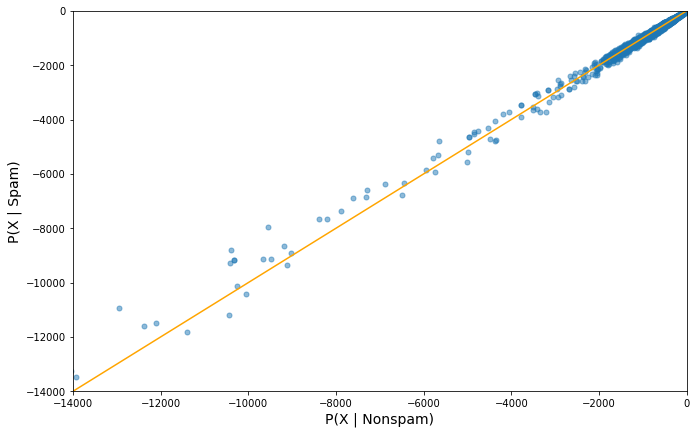

In [76]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = "orange")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

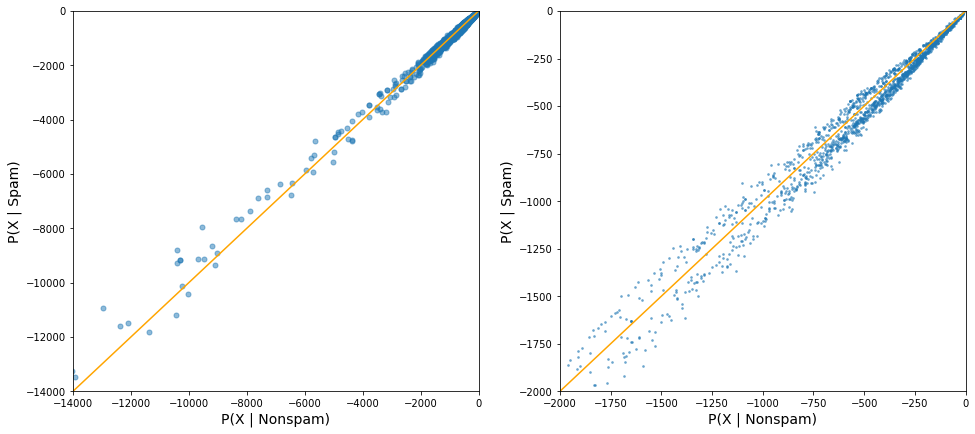

In [78]:
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.scatter(joint_log_ham, joint_log_spam, alpha = 0.5, s = 25)
plt.plot(linedata, linedata, color = "orange")

plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize = 14)
plt.ylabel(yaxis_label, fontsize = 14)
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.scatter(joint_log_ham, joint_log_spam, alpha = 0.5, s = 3)
plt.plot(linedata, linedata, color = "orange")

plt.show

In [79]:
# Chart Styling
sns.set_style("whitegrid")
labels = "Actual Category"
summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

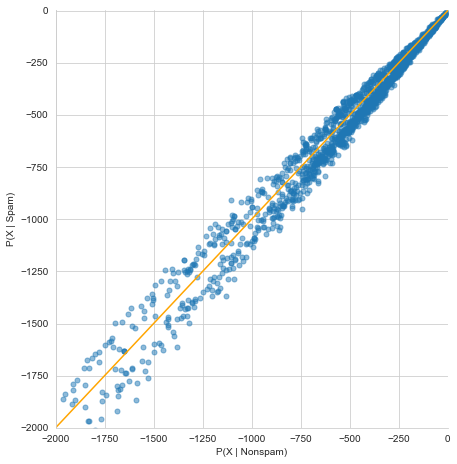

In [95]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False,
           scatter_kws = {"alpha": 0.5, "s": 25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color = "orange")
plt.show()

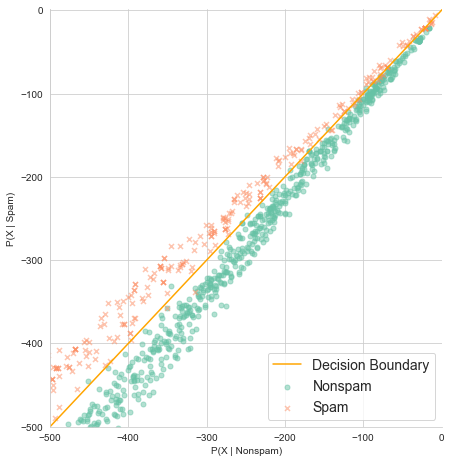

In [105]:
sns.lmplot(x = xaxis_label, y = yaxis_label, data = summary_df, height = 6.5, fit_reg = False, legend = False,
           scatter_kws = {"alpha": 0.5, "s": 25}, hue = labels, markers = ["o", "x"], palette = "Set2")
plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color = "orange")

plt.legend(("Decision Boundary", "Nonspam", "Spam"), loc = "lower right", fontsize = 14)

plt.show()

## False Positives and False Negatives

In [106]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1136,  588], dtype=int64))

In [ ]:
true_pos = (y_test == 1)